<h2><center>Week 2 - Assignment</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the second lecture.

**Important**: You will need sounddevice, numpy, scipy and matplotlib. To install these, run *pip install sounddevice numpy scipy matplotlib* in the terminal, or *!pip install sounddevice numpy scipy matplotlib* in Jupyter. You will also need the data in the *data* folder.

The exercise will be marked as passed if you get **at least 10/15** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, March 7, 2024.**

<h3 style="text-align:left;">Exercise 1 - Audio signal<span style="float: right">5 points</span></h3>

In this exercise you'll work with continuous audio signals. First we load and plot the audio signals:

TypeError: 'str' object is not callable

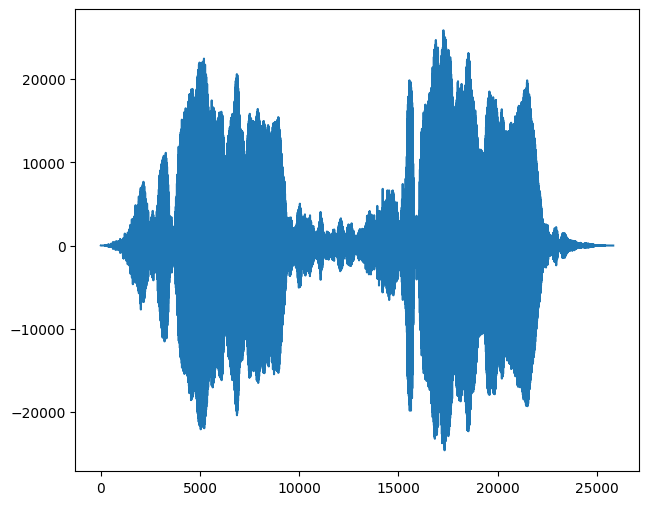

In [353]:
# Import dependencies
import time
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import read

fs_bird, sound_bird = read('./data/bird.wav')
fs_leaves, sound_leaves = read('./data/leaves.wav')

# Plot sounds in different subplots
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(sound_bird)
plt.title("Bird sound")
plt.subplot(1, 2, 2)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.show()

# Play sounds
time.sleep(1)
sd.play(sound_bird, fs_bird)
time.sleep(1)
sd.play(sound_leaves, fs_leaves)
time.sleep(1)

1. Double the amplitude of the second audio signal (leaves) using *numpy*. Then plot the amplified signal using *matplotlib*. (*1 point*)

In [ ]:
###
# YOUR CODE GOES HERE
###

2. The two sounds don't have the same length (number of samples). Print the length of the two sounds and create a new leaves sound as long as the birds sound. Print again the lenghts to make sure they match. (Use the amplified leaves sound previously created). (*1 point*)

In [ ]:
###
# YOUR CODE GOES HERE
###

3. Create a silence period (0 amplitude) of the same duration of the two sounds, using *numpy*. (*1 point*)

In [ ]:
###
# YOUR CODE GOES HERE
###

4. Finally, concatenate the diffent sounds into one. The order should be: silence, birds, silence, leaves, silence (use the amplified and cut leaves sound). Use *numpy* and plot the results. (*2 points*)

In [ ]:
###
# YOUR CODE GOES HERE
###

<h3 style="text-align:left;">Exercise 2 - Image data<span style="float: right">7 points</span></h3>

In this exercise, you'll work with an image, i.e. an n-dimensional matrix data. First, we load and plot the image:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread('./data/python.bmp')
im = np.array(im)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

The image is a 3-dimensional array, where the 1st and 2nd dimensions represent positions on the Y (rows) and X (columns) axes and the 3rd saturation values between 0 and 255 for that specific position, as [red, green, blue].

1. Set the pixels on the 50th to 60th row and and 200th to 210th column to green, and displays the resultant image. The data-type of the array should be an 8-bit unsigned integer. (*1 point*)

**NB!** 
- From the 50th row, up to and including the 60th; From the 200th column, up to and including the 210th.
- Keep in mind that the first dimension is related to the usual Y axis, and the second dimension to the usual X axis.

In [ ]:

def make_green(array: np.ndarray):
    """Set every pixel in the given array to green"""
    green_parts = array[:, :, 1]  # view with the green value of each pixel
    not_green_parts = array[:, :, ::2]  # view with he not-green, e.g. read and blue values of each pixel
    not_green_parts.fill(int('00', 16))  # set the not-green values of each pixel to 0
    green_parts.fill(
        int('ff', 16))  # set the green values of each pixel to 255, the max value for an 8-bit unsigned integer
    #therefore, each pixel in the selected columns has now a value of 00ff00 in hex, which is the color green.


make_green(im[
           49:60])  # make the rows from the 50th row up to and including the 60th row green. Index start at 49 since 49 is the 50th row.
make_green(im[:, 199:210])  # the same for the columns from 200th up to and including the 210th.

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()


2. The image created in point 1 will be the one you use in the rest of the exercise. Make a copy of the top half of the image, flip it along the 2nd axis using the appropriate numpy method, and plot the result. (*1 point*)

In [ ]:
top_half: np.ndarray = im[:im.shape[0] // 2].copy()
# assuming flipped around the second axis means a pixel at [x,y] will be at [x, width-y] after the flip
top_half = np.flip(top_half, axis=1)  # flips array along 2nd axis = axis 1, e.g. from left to right

#plot result
plt.figure(figsize=(4, 4))
plt.imshow(top_half)
plt.show()

3. Make a copy of the bottom half of your image, combine it together with the first half you flipped in point 2, and display the result. Also plot your original image and check whether it has changed. (*1 point*)

In [ ]:
bottom_half: np.ndarray = im[im.shape[0] // 2:].copy()
bottom_half = np.flip(bottom_half, axis=1)  # flips array along 2nd axis = axis 1, e.g. from left to right

new_im: np.ndarray = np.vstack([top_half, bottom_half])  # add both halves together

# plot combined halves
plt.figure(figsize=(4, 4))
plt.imshow(new_im)
plt.show()

# plot original image
plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

4. Make a shallow copy (view) of the top half of your image. Change every black pixel ([0, 0, 0]) to a green pixel ([0, 255, 0]). Plot the resulting colored top part, together with the base of your shallow copy and also the original image. (*2 points*)

**Hint**: to test that a condition holds for multiple elements use the *numpy.all* function.

In [ ]:
top_half_view: np.ndarray = im[:im.shape[0] // 2]  #get the top half of the image, this time as a view
black_pixels = np.all(top_half_view == [0, 0, 0], axis=-1)  # get all black pixels
top_half_view[black_pixels] = [0, 255, 0]  # replace the values of all black pixels with green
# plot top half

# plot the top half
plt.figure(figsize=(4, 4))
plt.imshow(top_half_view)
plt.show()

#plot the base of top_half_view, which is im
plt.figure(figsize=(4, 4))
plt.imshow(top_half_view.base)
plt.show()

# plot the original image
plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

5. In point 3, your original image should not have changed, while in point 4, the original image should show the same change as when plotting the base of your shallow copy. Give a brief explanation of why the original image changed in one instance, and not in the other. (*2 points*)

In point 3, the original image did not change, since we made for top and bottom half a copy of the original data, e.g, the data is copied to a different place in memory, so when the copied data is changed, this does not affect the original data.

In point 4 however, we crate a view of the top half which means we look at a portion of the data, but the original data is still referenced. Therefore, if we change something in a view, the original data is changed and hence we see the changes in the original image

<h3 style="text-align:left;">Exercise 3 - Tabular data<span style="float: right">3 points</span></h3>

In the following you'll work with tabular data, i.e. data related to multiple observations. The dataset consists of synthetic data on monthly average precipitations in 4 different countries: Switzerland, Italy, France and Germany. Let's first load the dataset and assign the variables:

In [ ]:
import numpy as np

precip = np.load("./data/precip.npy", allow_pickle=True)

precip[:, 0]  # 12 data points for Switzerland (one per month)
precip[:, 1]  # 12 data points for Italy (one per month)
precip[:, 2]  # 12 data points for France (one per month)
precip[:, 3]  # 12 data points for Germany (one per month)

1. Use built-in numpy methods to obtain an array with the maximum precipitation for each country, and the average precipitation *across* the five countries for each month. (*1 point*)

In [ ]:
###
# YOUR CODE GOES HERE
###

2. Obtain the maximum precipitation of the entire dataset. Next, use a numpy method to find out at which row and column in the dataset you would find this maximum precipitation at. (*2 points*)

In [ ]:
###
# YOUR CODE GOES HERE
###